# Is the Length of the Seasons Changing in Seoul?

South Korea’s climate is typically temperate with four distinct seasons. The seasons divide into Spring, Summer, Fall, and Winter, and each is bringing with it its seasonal feature and landscape. However, recently, people in South Korea widely think that the length of Spring and Fall is decreasing. Also, climate change and global warming are handling seriously among many scientists as a primary issue.

In this analysis, we will talk about whether the change of season length happened in a recent decade.

## Data

For this capstone project, we will be analyzing Climate data of Seoul from the Data Center of Seoul (http://data.seoul.go.kr). They are providing the file as year by year. I focused on the data from 2009 to 2018 (one decade).


The data contains the following fields:
* **관측일자 (Date of observation): Integer Variable**
* 지점명 (Observation Center): String Object
* **평균기온(℃) (Daily Average Temperature): Float Variable**
* **최저기온(℃) (Daily Minimum Temperature): Float Variable**
* **최대기온(℃) (Daily Maximum Temperature): Float Variable**
* 평균습도(%) (Daily average Humidity): Float Variable
* 최저습도(%) (Daily Minimum Humidity): Float Variable
* 최고습도(%) (Daily Maximum Humidity): Float Variable
* 평균풍속(m/s) (Daily Average Wind Speed): Float Variable
* 최대풍속(m/s) (Daily Maximum Wind Speed): Float Variable
* 강수량(mm) (Daily Precipitation): Float Variable

We will focus on Daily Temperatures for this analysis.



In [1]:
# Import Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Open Data Files from Project Directory
dataList = sorted(os.listdir('./'))
dfList = []
for dataName in dataList :
    if dataName[-4::] == 'xlsx' :
        dfList.append(pd.read_excel(dataName))

In [3]:
# Concatenate each File
df = pd.concat(dfList, sort=False)

In [4]:
df = df.reset_index(drop=True)

In [5]:
# Change Column Names for Analysis
df = df.rename(index=str, columns={'관측일자': 'Date', '평균기온(℃)': "Average(C)", '최저기온(℃)' : "Low(C)", '최대기온(℃)':"High(C)" })

In [6]:
# We will focus on the temperatures, so let's pull out the columns we need.
df_dailyMean = df.groupby('Date').mean().reset_index()
df_dailyMean = df_dailyMean[['Date','Average(C)','Low(C)','High(C)']]
df_dailyMean.head()

,Date,Average(C),Low(C),High(C)
0,20090114,-7.900000,-9.700000,-5.500000
1,20090115,-4.062500,-6.787500,-2.512500
2,20090116,-1.927273,-2.927273,0.045455
3,20090119,2.680000,0.180000,5.240000
4,20090120,2.550000,-1.520000,7.370000


## The Definition of Seasons in South Korea

According to the Korea Meteorological Administration,

when the average temperature as from the standard date until 9 days before is not going back to **under 5 degrees Celcius**, the standard date is defined as the start date of **Spring**.

when the average temperature as from the standard date until 9 days before is not going back to **under 20 degrees Celcius**, the standard date is defined as the start date of **Summer**.

when the average temperature as from the standard date until 9 days before is not going back to **above 20 degrees Celcius**, the standard date is defined as the start date of **Fall**.

when the average temperature as from the standard date until 9 days before is not going back to **above 5 degrees Celcius**, the standard date is defined as the start date of **Winter**.


## Meteorological Season Start Dates

In [7]:
# Add Average Temperarture of 9 days
addList = []
for k in range(0, len(df_dailyMean)) :
    if k >= 8 :
        addList.append(df_dailyMean.iloc[k-8:k+1]['Average(C)'].mean())
    else :
        addList.append(None)
df_dailyMean['9DaysAverage'] = addList

In [8]:
# Tagging Season based on the Definition
seasonList = ['Winter'] * 8
currentSeason = 'Winter'
for k in range(8, len(df_dailyMean)) :
    nineMin = min(df_dailyMean.iloc[k:k+30]['9DaysAverage'])
    nineMax = max(df_dailyMean.iloc[k:k+30]['9DaysAverage'])
    todayAvg = df_dailyMean.iloc[k]['9DaysAverage']
    if currentSeason=='Winter' and todayAvg >= 5 and nineMin >= 5:
        currentSeason = 'Spring'
    elif currentSeason=='Spring' and todayAvg >= 20 and nineMin >= 20:
        currentSeason = 'Summer'
    elif currentSeason=='Summer' and todayAvg < 20 and nineMax < 20:
        currentSeason = 'Fall'
    elif currentSeason=='Fall' and todayAvg < 5 and nineMax < 5:
        currentSeason = 'Winter'
    seasonList.append(currentSeason)
df_dailyMean['Seasons'] = seasonList

In [9]:
# Change into Datetime Format
df_dailyMean['Date'] = pd.to_datetime(df_dailyMean['Date'], format='%Y%m%d')
df_dailyMean

,Date,Average(C),Low(C),High(C),9DaysAverage,Seasons
0,2009-01-14,-7.900000,-9.700000,-5.500000,NaN,Winter
1,2009-01-15,-4.062500,-6.787500,-2.512500,NaN,Winter
2,2009-01-16,-1.927273,-2.927273,0.045455,NaN,Winter
3,2009-01-19,2.680000,0.180000,5.240000,NaN,Winter
4,2009-01-20,2.550000,-1.520000,7.370000,NaN,Winter
5,2009-01-21,4.354545,1.900000,6.745455,NaN,Winter
6,2009-01-22,4.636364,-1.336364,9.590909,NaN,Winter
7,2009-01-23,-7.790909,-10.309091,-1.236364,NaN,Winter
8,2009-01-24,-7.681818,-10.990909,-4.572727,-1.682399,Winter
9,2009-01-25,-3.045455,-9.218182,6.890909,-1.143005,Winter


## Season Start Dates

In [10]:
seasonDic = {'Spring':[], 'Summer':[], 'Fall':[], 'Winter':[]}
for k in range(len(df_dailyMean)):
    if df_dailyMean.iloc[k]['Seasons'] != df_dailyMean.iloc[k-1]['Seasons']:
        seasonDic[df_dailyMean.iloc[k]['Seasons']].append(df_dailyMean.iloc[k]['Date'])

In [11]:
df_seasonStart = pd.DataFrame.from_dict(seasonDic)
indexYear = df_seasonStart['Spring'].apply(lambda x : x.year)
df_seasonStart['Year'] = indexYear
df_seasonStart.set_index('Year', inplace=True)
df_seasonStart.reset_index()

,Year,Spring,Summer,Fall,Winter
0,2009,2009-03-16,2009-05-27,2009-10-07,2009-12-06
1,2010,2010-03-26,2010-06-04,2010-09-27,2010-12-08
2,2011,2011-03-31,2011-05-26,2011-09-30,2011-12-08
3,2012,2012-03-20,2012-05-23,2012-10-01,2012-11-21
4,2013,2013-03-29,2013-05-26,2013-10-14,2013-12-11
5,2014,2014-03-16,2014-05-24,2014-10-03,2014-12-04
6,2015,2015-03-18,2015-05-27,2015-10-05,2015-12-17
7,2016,2016-03-18,2016-05-20,2016-10-09,2016-12-06
8,2017,2017-03-15,2017-05-23,2017-10-11,2017-11-19
9,2018,2018-03-07,2018-05-28,2018-09-27,2018-12-07


**Accorading to a table above,**

* Spring starts from the middle or the end of March,
* Summer starts from the end of May, 
* Fall starts from the end of September or early October,
* Winter starts from the end of November or early December.

## Calculation of the Length of the Seasons

In [12]:
df_seasonStart['SpringLength'] = df_seasonStart['Summer'] - df_seasonStart['Spring']
df_seasonStart['SummerLength'] = df_seasonStart['Fall'] - df_seasonStart['Summer']
df_seasonStart['FallLength'] = df_seasonStart['Winter'] - df_seasonStart['Fall']
df_seasonStart['WinterLength'] = np.nan

In [13]:
firstDay = '01-01' # January 1st is Winter in Seoul.
indexYear = df_seasonStart['Spring'].apply(lambda x : x.year)
df_seasonStart['Year'] = indexYear
df_seasonStart.set_index('Year', inplace=True)
df_seasonStart = df_seasonStart.reset_index()

In [14]:
firstDay = '%s-01-01'
timeList = []
import sys
for k in range(len(df_seasonStart)):
    front = df_seasonStart.loc[k]['Spring'] - pd.Timestamp(firstDay % df_seasonStart.loc[k]['Year'])
    end = pd.Timestamp(firstDay % (df_seasonStart.loc[k]['Year'] + 1)) - df_seasonStart.loc[k]['Winter']
    timeList.append(front + end)
df_seasonStart['WinterLength'] = timeList
df_seasonStart

,Year,Spring,Summer,Fall,Winter,SpringLength,SummerLength,FallLength,WinterLength
0,2009,2009-03-16,2009-05-27,2009-10-07,2009-12-06,72 days,133 days,60 days,100 days
1,2010,2010-03-26,2010-06-04,2010-09-27,2010-12-08,70 days,115 days,72 days,108 days
2,2011,2011-03-31,2011-05-26,2011-09-30,2011-12-08,56 days,127 days,69 days,113 days
3,2012,2012-03-20,2012-05-23,2012-10-01,2012-11-21,64 days,131 days,51 days,120 days
4,2013,2013-03-29,2013-05-26,2013-10-14,2013-12-11,58 days,141 days,58 days,108 days
5,2014,2014-03-16,2014-05-24,2014-10-03,2014-12-04,69 days,132 days,62 days,102 days
6,2015,2015-03-18,2015-05-27,2015-10-05,2015-12-17,70 days,131 days,73 days,91 days
7,2016,2016-03-18,2016-05-20,2016-10-09,2016-12-06,63 days,142 days,58 days,103 days
8,2017,2017-03-15,2017-05-23,2017-10-11,2017-11-19,69 days,141 days,39 days,116 days
9,2018,2018-03-07,2018-05-28,2018-09-27,2018-12-07,82 days,122 days,71 days,90 days


In [15]:
df_new = df_seasonStart[['Year','SpringLength','SummerLength','FallLength','WinterLength']].set_index('Year')
df_new['SpringLength'] = df_new['SpringLength'].apply(lambda x : x.days) # Change data type for plotting graph.
df_new['SummerLength'] = df_new['SummerLength'].apply(lambda x : x.days)
df_new['FallLength'] = df_new['FallLength'].apply(lambda x : x.days)
df_new['WinterLength'] = df_new['WinterLength'].apply(lambda x : x.days)
df_new

,SpringLength,SummerLength,FallLength,WinterLength
Year,,,,
2009,72,133,60,100
2010,70,115,72,108
2011,56,127,69,113
2012,64,131,51,120
2013,58,141,58,108
2014,69,132,62,102
2015,70,131,73,91
2016,63,142,58,103
2017,69,141,39,116


In [16]:
df_new.mean()

SpringLength     67.3
SummerLength    131.5
FallLength       61.3
WinterLength    105.1
dtype: float64

In [17]:
df_new.std()

SpringLength     7.469196
SummerLength     8.669871
FallLength      10.708771
WinterLength     9.926955
dtype: float64

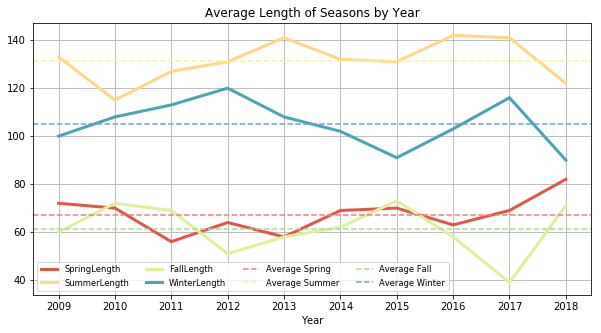

In [18]:
# Plotting
data = df_new.values
labels = ['Spring','Summer','Fall','Winter']
category_colors = plt.get_cmap('Spectral')(np.linspace(0.15, 0.85, data.shape[1]))
df_new[['SpringLength','SummerLength','FallLength','WinterLength']].plot( figsize = (10,5), lw = 3, grid = True, color=category_colors, xticks = df_new.index, label = labels)
# Add horizontal lines representing average values
plt.axhline(df_new['SpringLength'].mean(), linestyle = 'dashed', label = "Average Spring",  color ='#F47C7C')
plt.axhline(df_new['SummerLength'].mean(), linestyle = 'dashed', label = "Average Summer",  color ='#F7F48B')
plt.axhline(df_new['FallLength'].mean(), linestyle = 'dashed', label = "Average Fall",  color ='#A1DE93')
plt.axhline(df_new['WinterLength'].mean(), linestyle = 'dashed', label = "Average Winter",  color ='#70A1D7')
plt.legend(ncol=len(labels),bbox_to_anchor=(0, 0),loc='lower left', fontsize='small')
plt.title('Average Length of Seasons by Year')
plt.margins(.05,.05)
plt.show()

**Figure 1.** This graph represents the yearly change in the average length of the seasons.
Average Length of Spring is 67.3 (± 7.5) days, Summer is 131.5 (± 8.7) days, Fall is 61.3 (± 10.7) days, and Winter is 105.1 (± 9.9) days.
Each season have its variation, but we are hard to draw any conclusion that there is the change in season length.

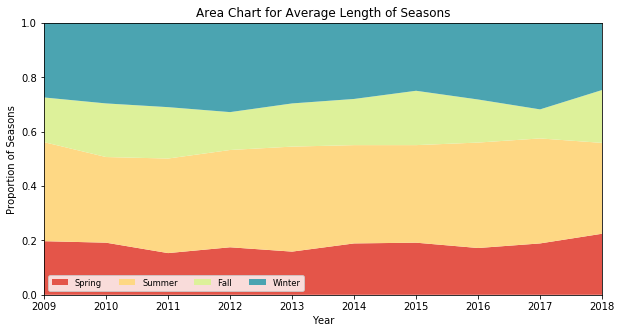

In [19]:
# Make data
df_seasonLength = df_seasonStart[['SpringLength','SummerLength','FallLength','WinterLength']]
data_perc = df_seasonLength.divide(df_seasonLength.sum(axis=1), axis=0)
category_colors = plt.get_cmap('Spectral')(np.linspace(0.15, 0.85, data.shape[1]))

# Make the plot
plt.figure(figsize = (10,5))
plt.stackplot(df_new.index,data_perc['SpringLength'],  data_perc['SummerLength'],  data_perc['FallLength'], data_perc['WinterLength'], labels=['Spring','Summer','Fall','Winter'],colors=category_colors)
plt.legend(ncol=len(labels), bbox_to_anchor=(0, 0),loc='lower left', fontsize='small')
plt.xlabel('Year')
plt.ylabel('Proportion of Seasons')
plt.margins(0,0)
plt.title('Area Chart for Average Length of Seasons')
plt.show()

**Figure 2.** Let's take a look at the result in another way. This chart represents the proportions of the seasons. Also, there are no dramatic variations, and we cannot draw the conclusion that there is a change of the season length from this chart.

## Yearly Change of Temperature by Season

We have taken a look at the variation of the season's length. We concluded there is no evidence to explain people saying that the length of Spring and Fall is decreasing.

So, I would like to figure out the reason why people are saying that. 

I have two hypotheses:

* **First, I guess people might think that Summer is more extended when Summer is warmer than before.**
* **Second, there might be a difference between the definition of Meteorological Season and the common belief of people.**

## Hypothesis 1: People Might Think That Summer Is More Extended When Summer Is WarmerThan Before

Let's check the average, minimum, and maximum temperature of each season by year to test the first hypothesis.

In [20]:
df_dailyMean['Year'] = df_dailyMean['Date'].apply(lambda x : x.year)

In [21]:
df_mean = df_dailyMean.pivot_table(values = 'Average(C)', index = ['Year','Seasons'], aggfunc=np.mean ).reset_index()

In [22]:
df_min = df_dailyMean.pivot_table(values = 'Average(C)', index = ['Year','Seasons'], aggfunc=np.min ).reset_index()

In [23]:
df_max = df_dailyMean.pivot_table(values = 'Average(C)', index = ['Year','Seasons'], aggfunc=np.max ).reset_index()

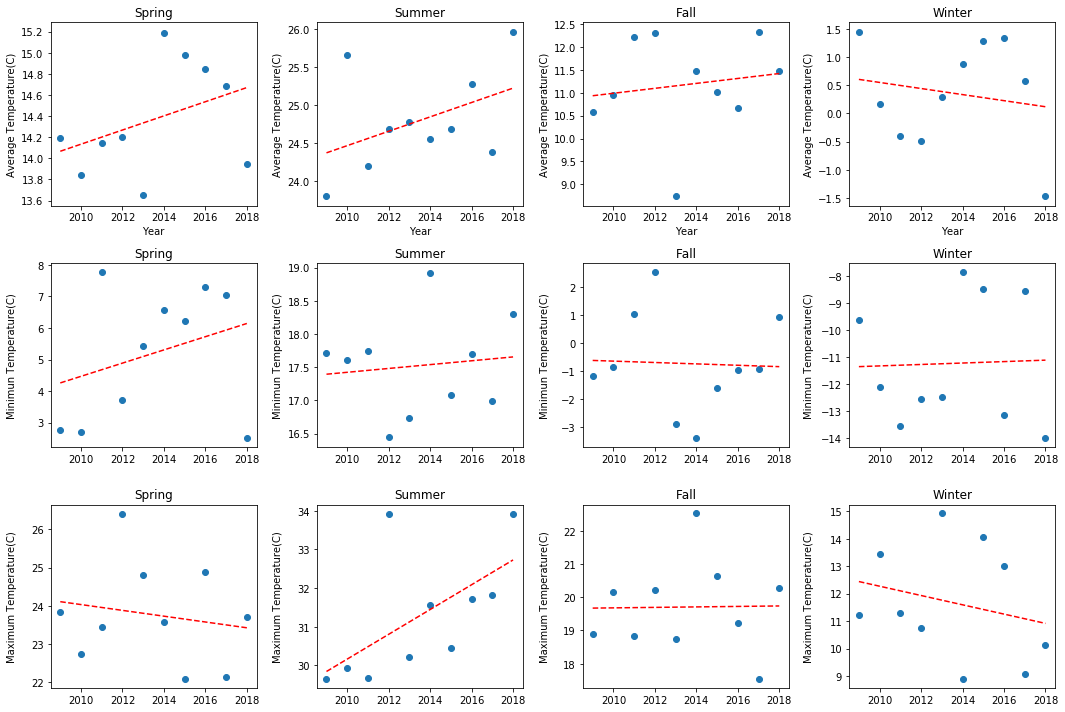

In [24]:
# Plotting
fig, axs = plt.subplots(3, 4, figsize=(15, 10))

seasons = ['Spring','Summer','Fall','Winter']

for k in range(len(seasons)):
    x = df_min[df_min['Seasons']=='%s'%seasons[k]]['Year']
    y = df_min[df_min['Seasons']=='%s'%seasons[k]]['Average(C)']
    A = np.vstack([x, np.ones(len(x))]).T
    m, c = np.linalg.lstsq(A , y, rcond=None)[0]
    axs[1,k].scatter(df_min[df_min['Seasons']=='%s' % seasons[k]]['Year'], df_min[df_min['Seasons']=='%s' % seasons[k]]['Average(C)'])
    axs[1,k].plot(x, m*x + c, 'r', label='Fitted line', color = 'r', linestyle = 'dashed' )
    axs[1,k].set_title('%s' % seasons[k])
    axs[1,k].set_ylabel('Minimun Temperature(C)')
    
for k in range(len(seasons)):
    x = df_mean[df_mean['Seasons']=='%s'%seasons[k]]['Year']
    y = df_mean[df_mean['Seasons']=='%s'%seasons[k]]['Average(C)']
    A = np.vstack([x, np.ones(len(x))]).T
    m, c = np.linalg.lstsq(A , y, rcond=None)[0]
    axs[0,k].scatter(df_mean[df_mean['Seasons']=='%s' % seasons[k]]['Year'], df_mean[df_mean['Seasons']=='%s' % seasons[k]]['Average(C)'])
    axs[0,k].plot(x, m*x + c, 'r', label='Fitted line', color = 'r', linestyle = 'dashed' )
    axs[0,k].set_title('%s' % seasons[k])
    axs[0,k].set_ylabel('Average Temperature(C)')
    axs[0,k].set_xlabel('Year')

for k in range(len(seasons)):
    x = df_max[df_max['Seasons']=='%s'%seasons[k]]['Year']
    y = df_max[df_max['Seasons']=='%s'%seasons[k]]['Average(C)']
    A = np.vstack([x, np.ones(len(x))]).T
    m, c = np.linalg.lstsq(A , y, rcond=None)[0]
    axs[2,k].scatter(df_max[df_max['Seasons']=='%s' % seasons[k]]['Year'], df_max[df_max['Seasons']=='%s' % seasons[k]]['Average(C)'])
    axs[2,k].plot(x, m*x + c, 'r', label='Fitted line', color = 'r', linestyle = 'dashed' )
    axs[2,k].set_title('%s' % seasons[k])
    axs[2,k].set_ylabel('Maximum Temperature(C)')

fig.align_ylabels()
plt.tight_layout()
plt.show()

**Figure 3.** I plotted the scatter plots to see whether any trend of annual temperature is changed. There seems to be nothing changed on the trends of the temperatures on the others, but the maximum temperature in Summer is slightly increasing. Based on this result, we can cautiously guess that hypothesis 1 might be true.

## Hypothesis 2: The Definition of Meteorological Season and the Common Belief of People Can Be Different

People in Korea generally think that four seasons are equally split into four periods, around 90 days. So I tried to compare the common belief to the definition of the meteorological seasons.

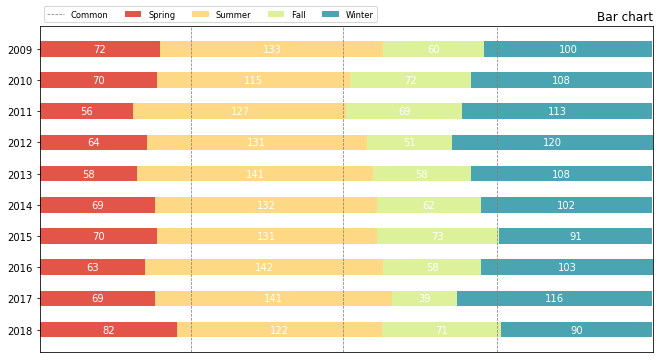

In [25]:
category_names = ['Spring','Summer','Fall','Winter']
labels = list(map(str,df_new.index))
data = df_new.values
data_cum = data.cumsum(axis=1)
category_colors = plt.get_cmap('Spectral')(np.linspace(0.15, 0.85, data.shape[1]))

fig, ax = plt.subplots(figsize=(11, 6))
ax.invert_yaxis()
ax.xaxis.set_visible(False)
ax.set_xlim(0, np.sum(data, axis=1).max())

for i, (colname, color) in enumerate(zip(category_names, category_colors)):
    widths = data[:, i]
    starts = data_cum[:, i] - widths
    ax.barh(labels, widths, left=starts, height=0.5,
            label=colname, color=color)
    xcenters = starts + widths / 2

    r, g, b, _ = color
    text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
    for y, (x, c) in enumerate(zip(xcenters, widths)):
        ax.text(x, y, str(int(c)), ha='center', va='center',
                color=text_color)
ax.axvline(90, lw=0.75, color = 'grey' ,linestyle = 'dashed', label = "Common")
ax.axvline(90+91, lw=0.75, color = 'grey' ,linestyle = 'dashed' )
ax.axvline(90+91+92, lw=0.75, color = 'grey' ,linestyle = 'dashed')

ax.legend(ncol=len(category_names)+1, bbox_to_anchor=(0, 1),loc='lower left', fontsize='small')

plt.title('Bar chart', loc = 'right')
plt.show()

**Figure 4.** The result shows that there are big differences between common think and the meteorological definition of seasons. Especially when Spring and Fall, the actual length of seasons are much shorter than people's think.

## Conclusion

Contrary to people's think in Korea, the results showed that Spring and Fall are not shortened. Instead, we have obtained the results of explaining why people think the length of Spring and Fall is declining. Firstly,  people might think that Summer is longer when Summer is warmer than the last year. Second, we saw that the definition of the meteorological season is quite different from the general think.


## Discussion and Future Work

We analyzed the data to check whether the period of each season is changing, and obtain the results explaining there is no annual change in the season length. Furthermore, we deduced that there might be other factors which are explaining the reasons why people think Spring and Fall are shorter than the last year.

### Connection to Global Warming Issue
We need to focus on the variation in maximum temperature in Summer (Figure 3). The phenomenon of increasing the maximum temperature of Summer can be related to the Global Warming issue. For further research, it is required to collect and analyze the data watched within a longer period and we might be able to connect this to Global Warming.